# Health Insurance Premium

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# checking the data types for each category

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
## Checking for any missing values
c = np.array(data.columns)

for col in c:
    print(col, ":", sum(data[col].isnull()))

age : 0
sex : 0
bmi : 0
children : 0
smoker : 0
region : 0
charges : 0


#### As there is no missing data in the data set, it would be a good idea to proceed with the visual and statistical analysis

In [6]:
## Checking the data in the categorical variables

print("sex:", data.sex.unique())
print("smoker:", data.smoker.unique())
print("region:", data.region.unique())

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


_________

## Data Visualisation

### Distirbution & Violin plot for Age

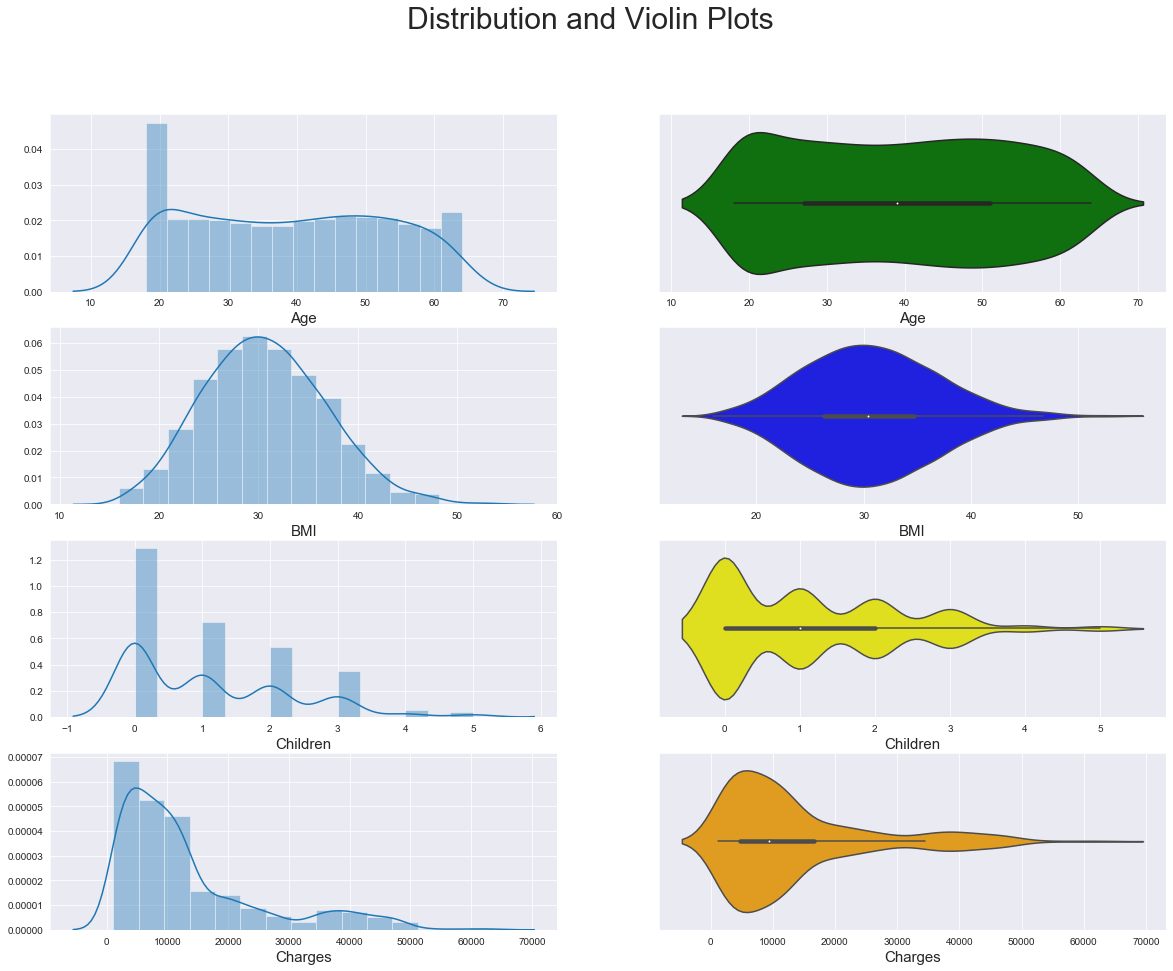

In [7]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,15))

d = sns.distplot(data.age, bins=15, ax=axes[0,0])
v = sns.violinplot(data=data, x='age', color='green', ax=axes[0,1])
d.set_xlabel("Age", size=15)
v.set_xlabel("Age", size=15)


d1 = sns.distplot(data.bmi, bins=15, ax=axes[1,0])
v1 = sns.violinplot(data=data, x='bmi', color='blue', ax=axes[1,1])
d1.set_xlabel("BMI", size=15)
v1.set_xlabel("BMI", size=15)


d2 = sns.distplot(data.children, bins=15, ax=axes[2,0])
v2 = sns.violinplot(data=data, x='children', color='yellow', ax=axes[2,1])
d2.set_xlabel("Children", size=15)
v2.set_xlabel("Children", size=15)


d3 = sns.distplot(data.charges, bins=15, ax=axes[3,0])
v3 = sns.violinplot(data=data, x='charges', color='orange', ax=axes[3,1])
d3.set_xlabel("Charges", size=15)
v3.set_xlabel("Charges", size=15)

fig.suptitle("Distribution and Violin Plots", size=30)

plt.show()

### Scatter plots to visually inspect for Multicollinearity

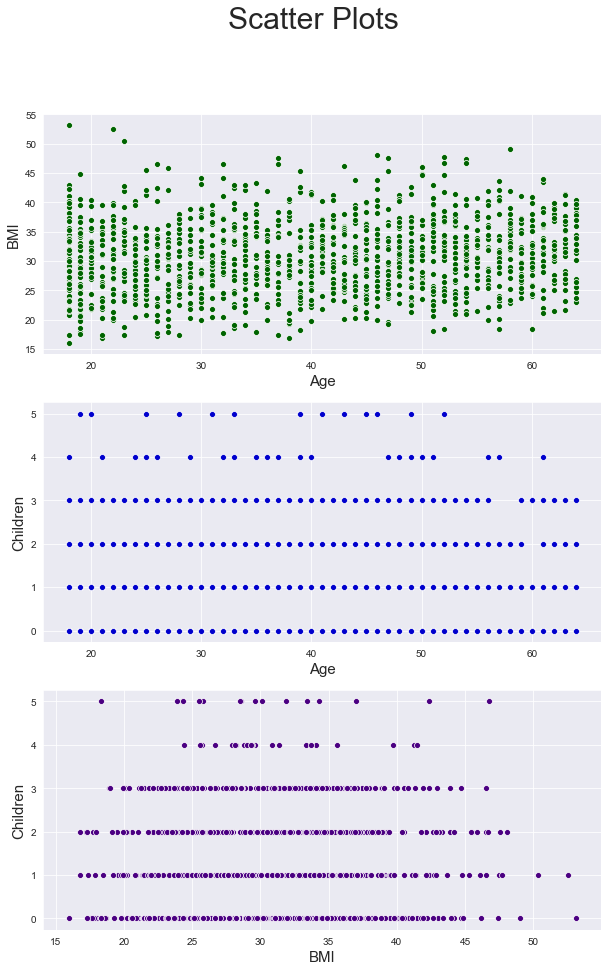

In [8]:
sns.set_style("darkgrid")
fig1, axes1 = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

sp = sns.scatterplot(data=data, x='age', y='bmi', color='darkgreen', ax=axes1[0])
sp.set_xlabel("Age", size=15)
sp.set_ylabel("BMI", size=15)


sp1 = sns.scatterplot(data=data, x='age', y='children', color='mediumblue', ax=axes1[1])
sp1.set_xlabel("Age", size=15)
sp1.set_ylabel("Children", size=15)


sp2 = sns.scatterplot(data=data, x='bmi', y='children', color='indigo', ax=axes1[2])
sp2.set_xlabel("BMI", size=15)
sp2.set_ylabel("Children", size=15)

fig1.suptitle("Scatter Plots", size=30)

plt.show()

### Heatmap for correlation

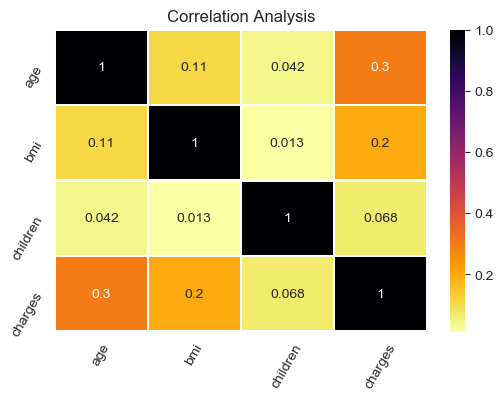

In [9]:
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(data.corr(),annot=True,lw=1,linecolor='white',cmap='inferno_r')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

________

# Machine Learning Regression Models

## Data Preprocessing

In [10]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].values

In [11]:
# Need to ensure that x and y are in a 2-Dimenseional format. If not, they must be transformed to be in 2D
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [12]:
# Changing the shape of y to 2-Dimensional
y = y.reshape(-1,1)
y.shape

(1338, 1)

________

## Encoding the categorical variables

In [13]:
ct = make_column_transformer((OneHotEncoder(), ['sex', 'smoker','region']), remainder='passthrough')
x = ct.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0


## Splitting the data for training and testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1070
268
1070
268


### Normalising the data (Useful for the Support Vector Regression)

In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train[:, 8:] = sc_x.fit_transform(x_train[:, 8:])
x_test[:, 8:] = sc_x.fit_transform(x_test[:, 8:])
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

## Regression 

### Multiple Linear Regression

In [17]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_hat = regressor.predict(x_test)

pd.DataFrame({"y_test": sc_y.inverse_transform(y_test).flatten(),
              "y_hat": sc_y.inverse_transform(y_hat).flatten()})


# Using the .flatten() method because I need a 1D array to make create a Pandas DataFrame

,y_test,y_hat
0,9724.53000,11370.341604
1,8547.69130,9554.717122
2,45702.02235,40116.798726
3,12950.07120,16994.964912
4,9644.25250,6528.898196
...,...,...
263,15019.76005,15208.992589
264,6664.68595,8231.414692
265,20709.02034,16911.236308
266,40932.42950,34457.684883


In [18]:
# R-squared for multiple linear regression

r2_mlr = r2_score(y_test, y_hat)
r2_mlr

0.8016119391219665

### Polynomial Regression

In [19]:
# Writing a function where I can choose the degrees for the polynomial regression


def poly_regressor(degrees):
    poly_reg = PolynomialFeatures(degree=degrees)
    x_poly = poly_reg.fit_transform(x_train)
    regressor1 = LinearRegression()
    regressor1.fit(x_poly, y_train)
    y_hat1 = regressor1.predict(poly_reg.transform(x_test))
    r2_poly = r2_score(y_test, y_hat1)
    return r2_poly

In [20]:
degrees_list = list(np.arange(2, 9, 2))

for n in degrees_list:
    print("r2 for Degrees =", n, ":", poly_regressor(degrees=n))

r2 for Degrees = 2 : 0.8734655402963276
r2 for Degrees = 4 : 0.8266265797939545
r2 for Degrees = 6 : -11081449269999.896
r2 for Degrees = 8 : -8.605653385924289e+17


#### I will be using the Polynomial Regression with 2 degrees for my final comparison as it has produced the best R-Squared compared to the other polynomials

### Support Vector Regressions

In [21]:
regressor2 = SVR(kernel='rbf')
regressor2.fit(x_train, y_train)
y_hat2 = regressor2.predict(x_test)
pd.DataFrame({"y_test": sc_y.inverse_transform(y_test).flatten(),
              "y_hat": sc_y.inverse_transform(y_hat2).flatten()})

,y_test,y_hat
0,9724.53000,10846.894945
1,8547.69130,9387.077982
2,45702.02235,47847.498845
3,12950.07120,14184.100802
4,9644.25250,11368.558680
...,...,...
263,15019.76005,16128.242396
264,6664.68595,7694.824085
265,20709.02034,12530.850926
266,40932.42950,41730.826881


In [22]:
r2_svr = r2_score(y_test, y_hat2)
r2_svr

0.894684908151134

### Decision Tree Regression

In [23]:
regressor3 = DecisionTreeRegressor(random_state=0)
regressor3.fit(x_train, y_train)
y_hat3 = regressor3.predict(x_test)
pd.DataFrame({"y_test": sc_y.inverse_transform(y_test).flatten(),
              "y_hat": sc_y.inverse_transform(y_hat3).flatten()})

,y_test,y_hat
0,9724.53000,10243.195786
1,8547.69130,8667.566830
2,45702.02235,48261.079737
3,12950.07120,13786.919902
4,9644.25250,9399.711623
...,...,...
263,15019.76005,16086.972807
264,6664.68595,6372.557028
265,20709.02034,11824.446822
266,40932.42950,43834.213956


In [24]:
r2_dtr = r2_score(y_test, y_hat3)
r2_dtr

0.7074690864820694

### Random Forest Regression

In [25]:
# Writing a function that will produce the R-Squared for a Random Forest Regression where I can choose the 
# number of estimators. I will then use various R-Squared obtained to determine how many estimators the regression
# should have.

def rf_regressor(estimators):
    regressor4 = RandomForestRegressor(n_estimators = estimators, random_state=0)
    regressor4.fit(x_train, y_train.flatten())
    y_hat4 = regressor4.predict(x_test).flatten()
    r2_rf = r2_score(y_test.flatten(), y_hat4)
    
    return r2_rf

In [28]:
estimators_list = np.arange(2, 25, 2)

for n in estimators_list:
    print("R-Squared for estimators =", n, ":", rf_regressor(estimators=n))

R-Squared for estimators = 2 : 0.738159741378984
R-Squared for estimators = 4 : 0.8070549020501474
R-Squared for estimators = 6 : 0.8230474908608495
R-Squared for estimators = 8 : 0.8262755282951616
R-Squared for estimators = 10 : 0.8377248234987723
R-Squared for estimators = 12 : 0.8454886618747532
R-Squared for estimators = 14 : 0.8518572560485981
R-Squared for estimators = 16 : 0.8503622614667531
R-Squared for estimators = 18 : 0.854132148100051
R-Squared for estimators = 20 : 0.8563507784818233
R-Squared for estimators = 22 : 0.8553447831909085
R-Squared for estimators = 24 : 0.8530632732327508


#### We can see that the best R-squared produced is for estimators = 20, hence, I will be using this one for my final  comparison

_______

## Comparison

In [31]:
r_squared = pd.DataFrame([round(r2_mlr, 2), round(poly_regressor(degrees=2), 2), round(r2_svr, 2),
                         round(r2_dtr, 2), round(rf_regressor(estimators=20), 2)],
            ["Multiple Linear Regression", "Polynomial", "SVR", "Decision Tree", "Random Forest"])
r_squared.columns = ["R-Squared Score"]
r_squared

,R-Squared Score
Multiple Linear Regression,0.80
Polynomial,0.87
SVR,0.89
Decision Tree,0.71
Random Forest,0.86


#### The SVR is the best model to predict Health Insurance Premium because it minimises the residuals.